# Explore here

In [1]:
import pandas as pd
import requests
import io
import urllib3

urllib3.disable_warnings(urllib3.exceptions.InsecureRequestWarning)

url = "https://breathecode.herokuapp.com/asset/internal-link?id=809&path=housing.csv"

response = requests.get(url, verify=False)

dataframe = pd.read_csv(io.StringIO(response.text), sep=";")

dataframe.head(2)

,"MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal"
0,"8.3252,41.0,6.984126984126984,1.02380952380952..."
1,"8.3014,21.0,6.238137082601054,0.97188049209138..."


In [3]:
import pandas as pd
import requests
import io
import urllib3

urllib3.disable_warnings(urllib3.exceptions.InsecureRequestWarning)

url = "https://breathecode.herokuapp.com/asset/internal-link?id=809&path=housing.csv"

response = requests.get(url, verify=False)

dataframe = pd.read_csv(io.StringIO(response.text), sep=",")

dataframe.head(2)

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
0,8.3252,41.0,6.984127,1.02381,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.97188,2401.0,2.109842,37.86,-122.22,3.585


Datos cargados correctamente. Columnas detectadas: ['Latitude', 'Longitude', 'MedInc']


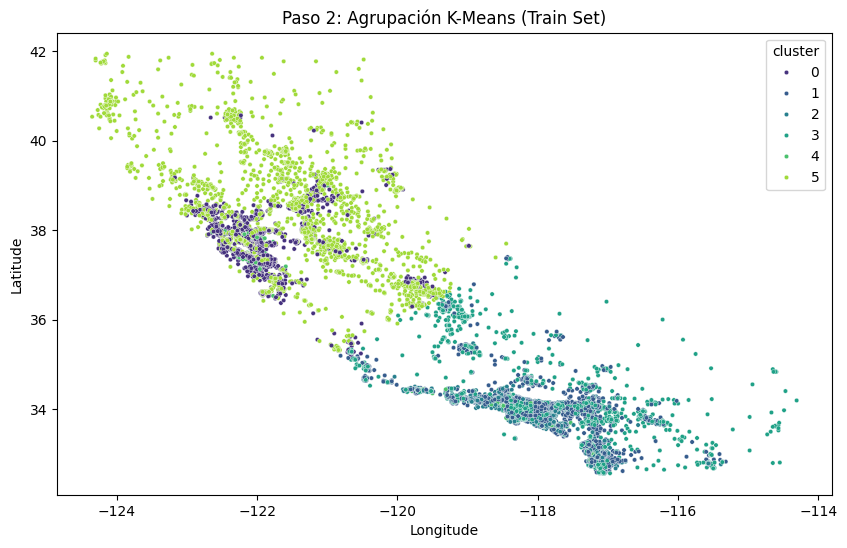

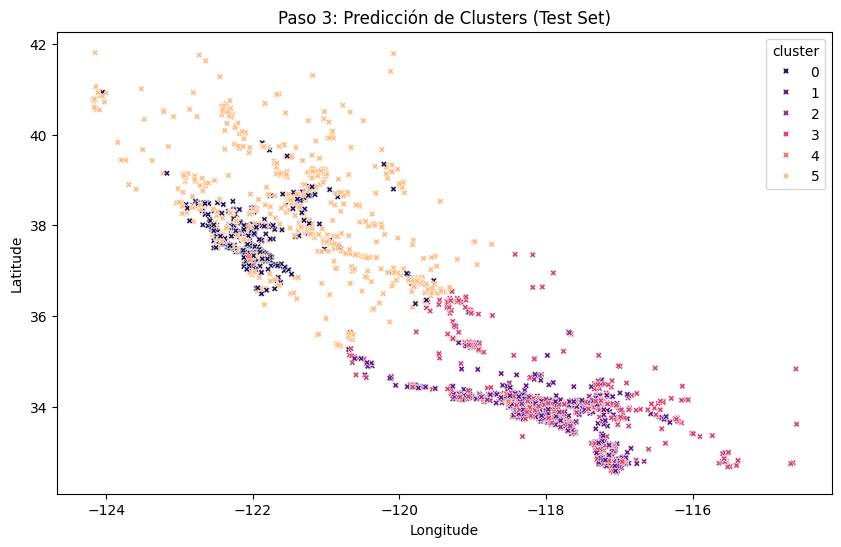


--- Estadísticas del Modelo de Clasificación Supervisada ---
              precision    recall  f1-score   support

           0       0.99      0.99      0.99       561
           1       1.00      1.00      1.00       983
           2       0.99      1.00      0.99       299
           3       1.00      1.00      1.00      1111
           4       0.98      0.97      0.98        62
           5       1.00      0.99      1.00      1112

    accuracy                           1.00      4128
   macro avg       0.99      0.99      0.99      4128
weighted avg       1.00      1.00      1.00      4128



['models/classifier_model.pkl']

In [6]:
import pandas as pd
import requests
import io
import urllib3
import matplotlib.pyplot as plt
import seaborn as sns
import joblib
import os
from sklearn.model_selection import train_test_split
from sklearn.cluster import KMeans
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report

urllib3.disable_warnings(urllib3.exceptions.InsecureRequestWarning)

if not os.path.exists('models'):
    os.makedirs('models')

url = "https://breathecode.herokuapp.com/asset/internal-link?id=809&path=housing.csv"
response = requests.get(url, verify=False)

df = pd.read_csv(io.StringIO(response.text), sep=",")

X = df[["Latitude", "Longitude", "MedInc"]]

X_train, X_test = train_test_split(X, test_size=0.2, random_state=42)

X_train = X_train.copy()
X_test = X_test.copy()

print(f"Datos cargados correctamente. Columnas detectadas: {list(X.columns)}")

kmeans = KMeans(n_clusters=6, random_state=42)

X_train["cluster"] = kmeans.fit_predict(X_train)

X_train["cluster"] = X_train["cluster"].astype("category")

plt.figure(figsize=(10, 6))
sns.scatterplot(data=X_train, x="Longitude", y="Latitude", hue="cluster", palette="viridis", s=10)
plt.title("Paso 2: Agrupación K-Means (Train Set)")
plt.show()


X_test["cluster"] = kmeans.predict(X_test)
X_test["cluster"] = X_test["cluster"].astype("category")

plt.figure(figsize=(10, 6))
sns.scatterplot(data=X_test, x="Longitude", y="Latitude", hue="cluster", palette="magma", marker='X', s=20)
plt.title("Paso 3: Predicción de Clusters (Test Set)")
plt.show()

y_train_label = X_train["cluster"]
X_train_features = X_train.drop("cluster", axis=1)

y_test_label = X_test["cluster"]
X_test_features = X_test.drop("cluster", axis=1)

classifier = RandomForestClassifier(n_estimators=100, random_state=42)
classifier.fit(X_train_features, y_train_label)

y_pred = classifier.predict(X_test_features)
print("\n--- Estadísticas del Modelo de Clasificación Supervisada ---")
print(classification_report(y_test_label, y_pred))

joblib.dump(kmeans, "models/kmeans_model.pkl")
joblib.dump(classifier, "models/classifier_model.pkl")

